Binary Classification Using CNN || Malaria Cell Images Dataset

In [1]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 672M/675M [00:10<00:00, 64.5MB/s]
100% 675M/675M [00:10<00:00, 66.7MB/s]


In [2]:
import zipfile
with zipfile.ZipFile("cell-images-for-detecting-malaria.zip", 'r') as zip_ref:
    zip_ref.extractall()  # Extract all files in the current directory


In [3]:
import os
base_dir = './cell_images/cell_images'  # Adjust based on the extraction
print(os.listdir(base_dir))  # Lists the contents of the directory

['Uninfected', 'Parasitized']


In [14]:
infected_dir = '/content/cell_images/Parasitized'
uninfected_dir = '/content/cell_images/Uninfected'

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
def load_data(infected_dir, uninfected_dir):
    data = []
    labels = []

    # Load infected images
    for img_name in os.listdir(infected_dir):
        img_path = os.path.join(infected_dir, img_name)
        try:
            img = Image.open(img_path)
            img = img.resize((32, 32))  # Resize the image to 32x32
            img = np.array(img)
            data.append(img)
            labels.append(1)  # 1 for infected
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

    # Load uninfected images
    for img_name in os.listdir(uninfected_dir):
        img_path = os.path.join(uninfected_dir, img_name)
        try:
            img = Image.open(img_path)
            img = img.resize((32, 32))  # Resize the image to 32x32
            img = np.array(img)
            data.append(img)
            labels.append(0)  # 0 for uninfected
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

    data = np.array(data)
    labels = np.array(labels)

    return data, labels


In [15]:
# Load data
X, y = load_data(infected_dir, uninfected_dir)

Error loading image Thumbs.db: cannot identify image file '/content/cell_images/Parasitized/Thumbs.db'
Error loading image Thumbs.db: cannot identify image file '/content/cell_images/Uninfected/Thumbs.db'


In [16]:
# Normalize pixel values
X = X / 255.0

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y, num_classes=2)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,690 (1.20 MB)

 Trainable params: 314,690 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=32,
                    validation_data=(X_val, y_val),
                    epochs=20)


Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.7660 - loss: 0.4884 - val_accuracy: 0.9403 - val_loss: 0.1725
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.9389 - loss: 0.1784 - val_accuracy: 0.9450 - val_loss: 0.1581
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.9510 - loss: 0.1452 - val_accuracy: 0.9526 - val_loss: 0.1431
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9577 - loss: 0.1322 - val_accuracy: 0.9554 - val_loss: 0.1340
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9591 - loss: 0.1227 - val_accuracy: 0.9521 - val_loss: 0.1407
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9596 - loss: 0.1213 - val_accuracy: 0.9556 - val_loss: 0.1369
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9630 - loss: 0.1123 - val_accuracy: 0.9543 - val_loss: 0.1377
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9667 - loss: 0.0981 - 

In [22]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_acc:.4f}')


173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9540 - loss: 0.2202
Validation accuracy: 0.9546


In [24]:
# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2715
           1       0.96      0.95      0.96      2797

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512

[[2597  118]
 [ 132 2665]]


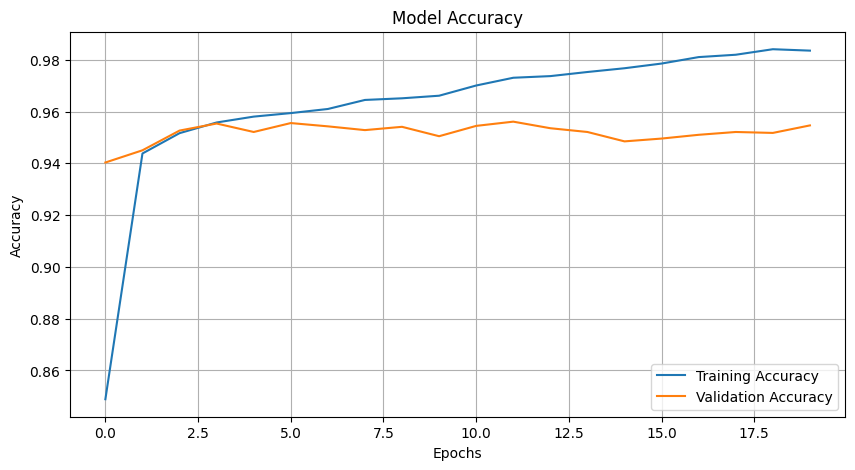

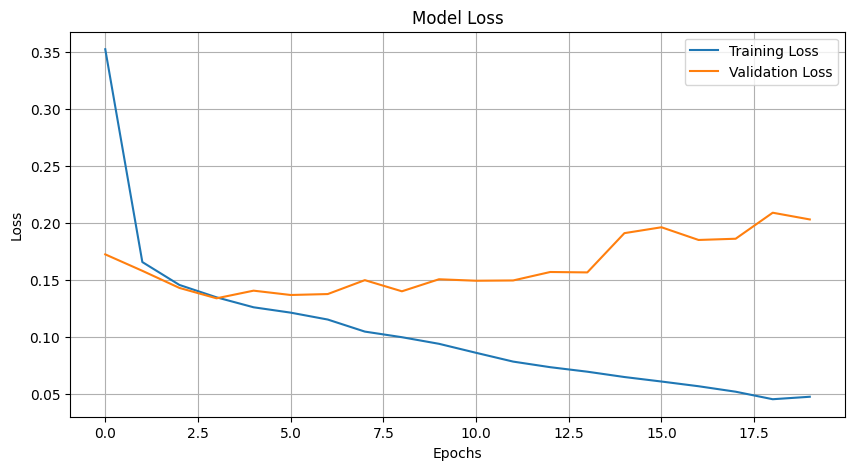

In [28]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



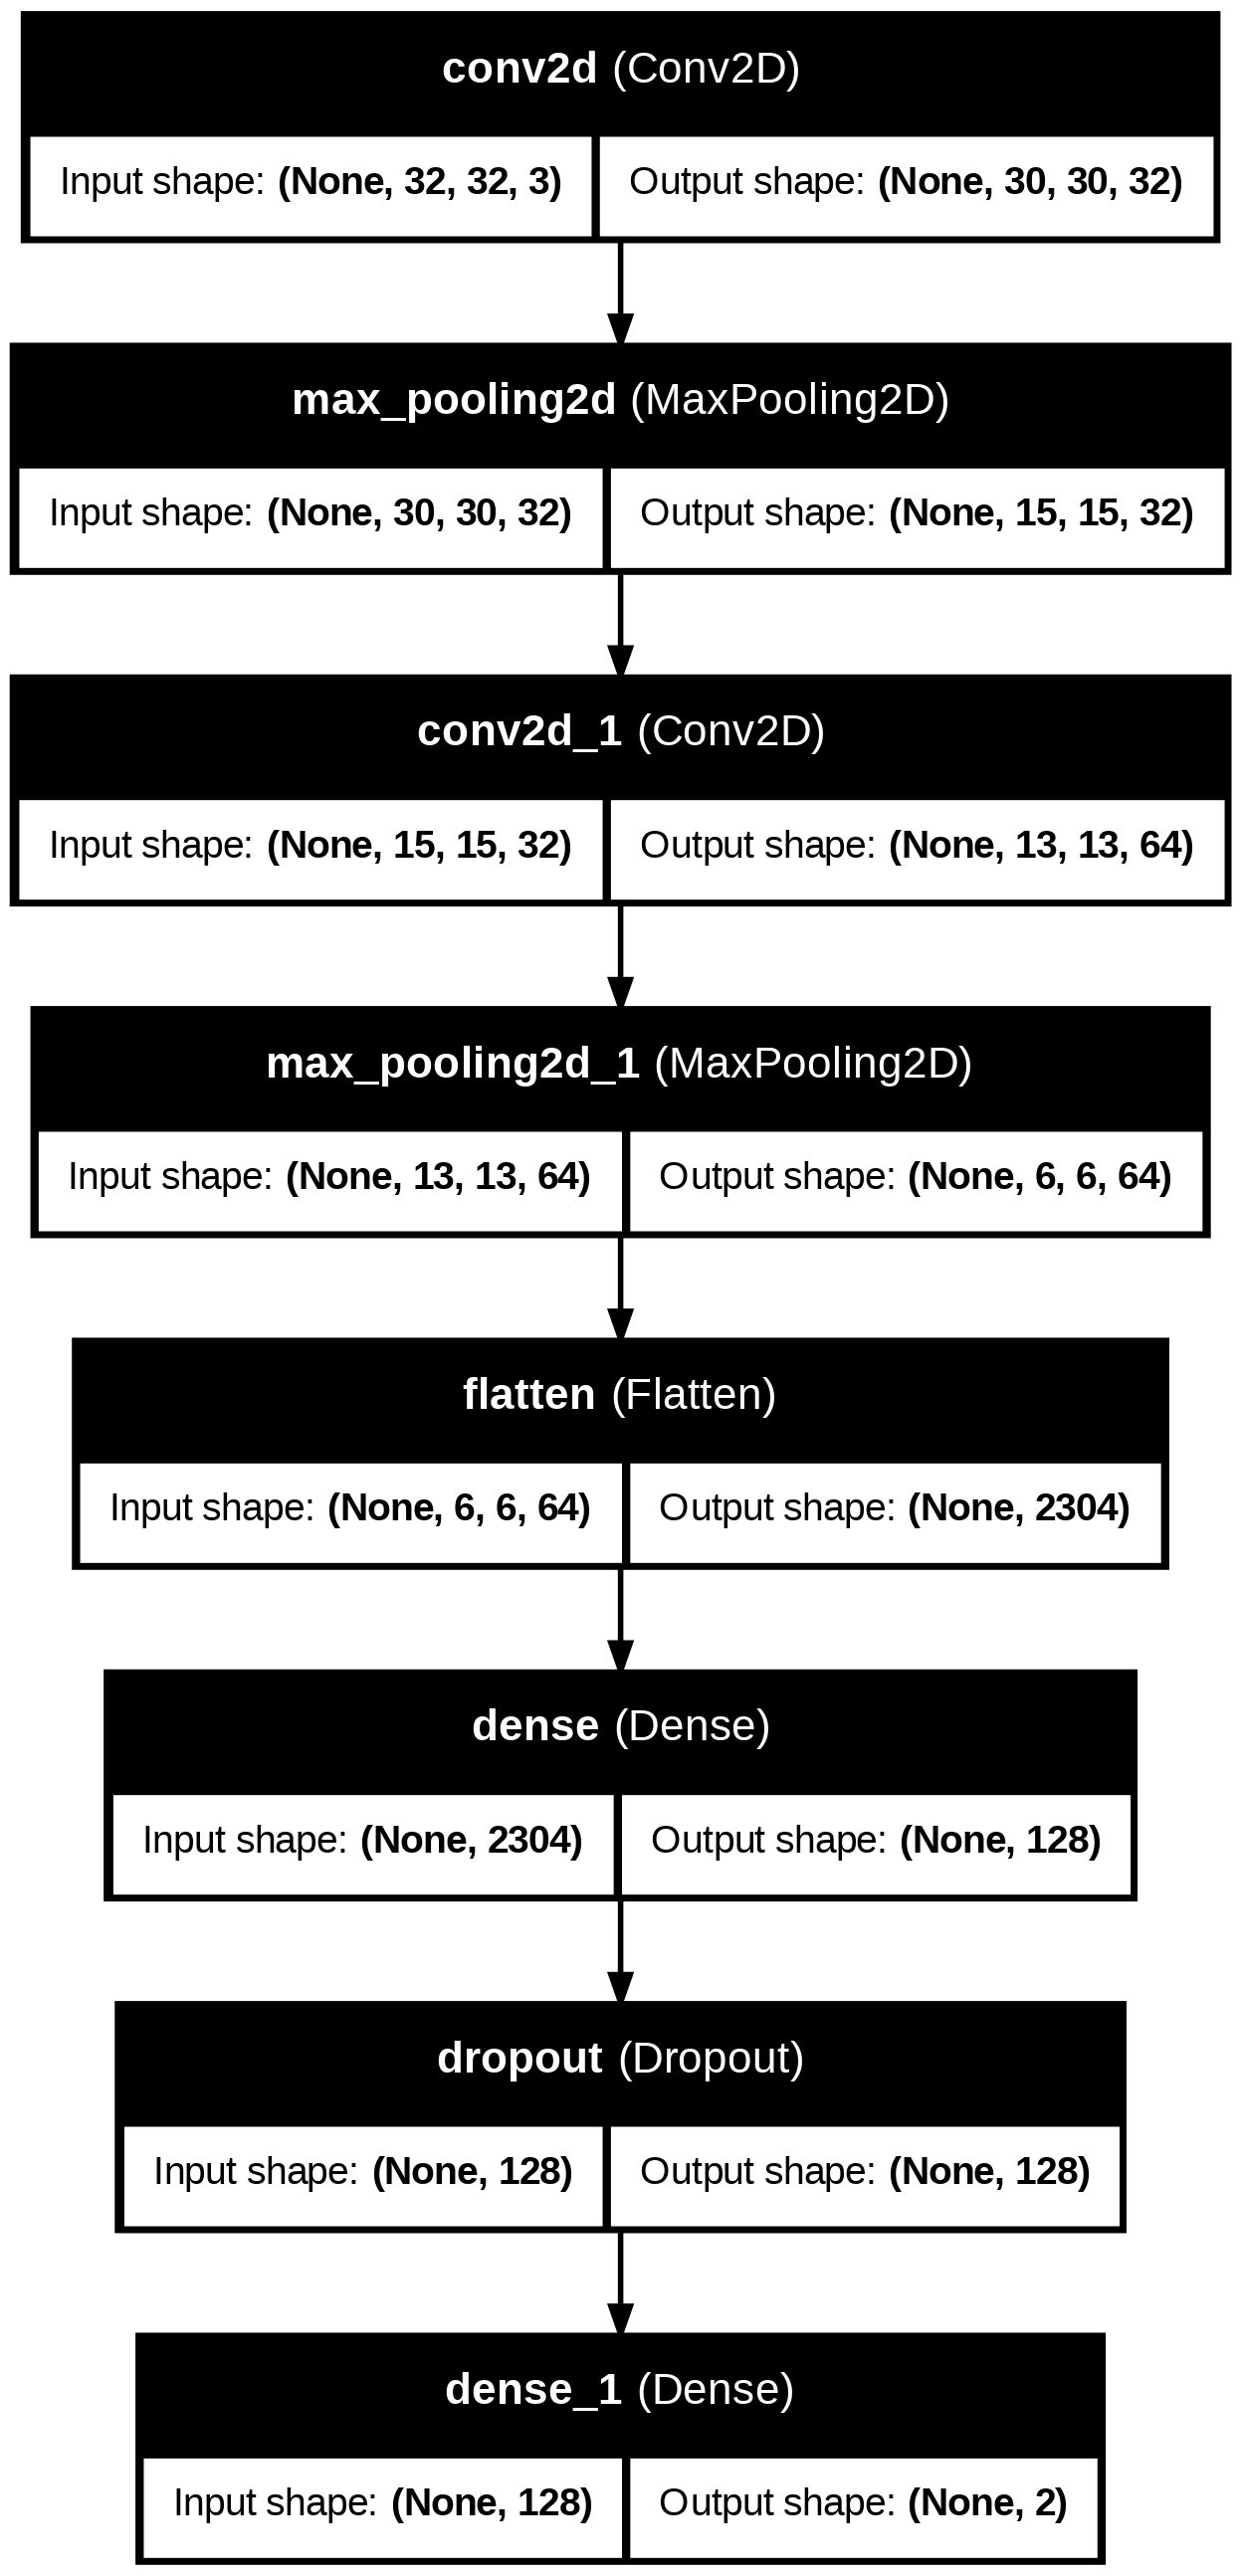

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_diagram.png',show_shapes=True,show_layer_names='True')

### SAMPLE INPUT IMAGE TEST

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is classified as: Infected


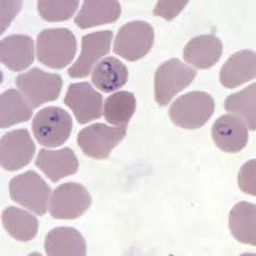

In [45]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Function to preprocess the uploaded image
def preprocess_image(image_path, img_size=(32, 32)):
    test_img = cv2.imread(image_path)

    test_img_resized = cv2.resize(test_img, img_size)

    test_img_normalized = test_img_resized / 255.0

    # Reshape the image to the format (1, height, width, channels)
    test_input = test_img_normalized.reshape((1, img_size[0], img_size[1], 3))

    return test_img, test_input

# Function to load and make predictions on a single image
def predict_image(model, image_path, display_size=(256, 256)):
    # Preprocess the uploaded image
    original_img, processed_image = preprocess_image(image_path)

    # Use the model to predict
    prediction = model.predict(processed_image)

    # Get the class label (0 or 1)
    predicted_label = np.argmax(prediction, axis=1)[0]

    # Mapping: 0 - Uninfected, 1 - Infected
    label = "Uninfected" if predicted_label == 0 else "Infected"

    # Resize the image for display purposes
    display_img = cv2.resize(original_img, display_size)

    # Display the image and the prediction
    print(f"The image is classified as: {label}")
    cv2_imshow(display_img)  # Show the image with the new display size

# Example usage
image_path = '/content/malaria_pos.jpeg'  # Provide the path of the uploaded image here
predict_image(model, image_path)
